In [49]:
import warnings
warnings.simplefilter('ignore')

In [50]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 

In [51]:
import folium
from shapely.geometry import Polygon, Point

import requests 
from datetime import datetime, timedelta

In [52]:
import openaq
api = openaq.OpenAQ()

In [68]:
# get stations in delhi
pollution_stations = api.locations(city='Delhi', df=True, limit=1000)[['location', 'lastUpdated', 'coordinates.latitude', 'coordinates.longitude']]
pollution_stations = pollution_stations.drop_duplicates().rename(columns = {'coordinates.latitude' : 'latitude', 'coordinates.longitude' : 'longitude'})
pollution_stations = pollution_stations.dropna()
pollution_stations

,location,lastUpdated,latitude,longitude
0,US Diplomatic Post: New Delhi,2022-10-06 14:30:00+00:00,28.635760,77.224450
1,"NSIT Dwarka, Delhi - CPCB",2022-10-06 14:00:00+00:00,28.609090,77.032541
2,"Shadipur, Delhi - CPCB",2022-10-06 14:00:00+00:00,28.651478,77.147311
3,"IGI Airport (T3), Delhi - IMD",2022-10-06 14:00:00+00:00,28.562776,77.118005
4,"Pusa, Delhi - DPCC",2022-10-06 14:00:00+00:00,28.639645,77.146262
...,...,...,...,...
113,"Anand Vihar, Delhi - DPCC",2018-02-21 21:15:00+00:00,28.650800,77.315200
114,"Mandir Marg, Delhi - DPCC",2018-02-21 21:15:00+00:00,28.634100,77.200500
121,US Diplomatic Post: New Delhi,2016-11-09 16:30:00+00:00,28.598096,77.189066
123,Civil Lines,2015-07-10 08:15:00+00:00,28.678700,77.226200


In [61]:
## Lets get boundary of delhi city from OSM and plot it
search_string = 'Delhi'
urlData = requests.get(f'https://nominatim.openstreetmap.org/search.php?q={search_string}&polygon_geojson=1&format=json').json()
bounds = pd.DataFrame.from_dict(urlData)
bounds.head()

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon,geojson
0,25448708,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,2702400314,"[28.4917178, 28.8117178, 77.0619388, 77.3819388]",28.6517178,77.2219388,"Delhi, Kotwali Tehsil, Central Delhi, Delhi, 110006, India",place,city,0.770289,https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png,"{'type': 'Point', 'coordinates': [77.2219388, 28.6517178]}"
1,338166806,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,1942586,"[28.4046285, 28.8834464, 76.8388351, 77.346601]",28.6273928,77.1716954,"Delhi, India",boundary,administrative,0.770289,https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png,"{'type': 'Polygon', 'coordinates': [[[76.8388351, 28.5732306], [76.8388947, 28.5726624], [76.8401246, 28.5714724], [76.8401675, 28.5696275], [76.8401913, 28.5695522], [76.8423776, 28.5626414], [76.8438304, 28.5618782], [76.8437917, 28.5565426], [76.8455045, 28.554104], [76.8458603, 28.5500119], [76.8525086, 28.5480013], [76.860975, 28.5454749], [76.8644469, 28.5436729], [76.8663674, 28.5415542], [76.8676033, 28.5361423], [76.8713284, 28.5344136], [76.8724566, 28.5337105], [76.8735857, 28.5329734], [76.8736018, 28.5329284], [76.8737365, 28.5326041], [76.8742857, 28.5310168], [76.8742911, 28.5287423], [76.8764267, 28.5260698], [76.8768675, 28.5249498], [76.8850534, 28.5210524], [76.8871384, 28.5203063], [76.8870184, 28.5197021], [76.8855312, 28.5169805], [76.8835848, 28.512534], [76.8816221, 28.5099063], [76.8805219, 28.5055815], [76.8815572, 28.5046509], [76.8818812, 28.5047475], [76.8828629, 28.5039866], [76.8843317, 28.5030928], [76.8858949, 28.5025813], [76.8854384, 28.5013759], [76.8899908, 28.5010163], [76.8919497, 28.5008314], [76.8927029, 28.5012844], [76.8969407, 28.5067536], [76.8983531, 28.5090503], [76.9006383, 28.509682], [76.902943, 28.5089253], [76.9069036, 28.5137629], [76.9099794, 28.5120699], [76.9101567, 28.512058], [76.9119085, 28.5121736], [76.9159189, 28.5107953], [76.9184236, 28.5092347], [76.9209019, 28.5069098], [76.922178, 28.5072662], [76.9242611, 28.5078479], [76.9275524, 28.5104953], [76.9277636, 28.5105102], [76.9349626, 28.5110191], [76.9357707, 28.5105161], [76.9397376, 28.5077838], [76.9433253, 28.5053127], [76.9454202, 28.5053976], [76.9527581, 28.5053165], [76.9542983, 28.5057989], [76.9620491, 28.5115276], [76.9706359, 28.5157991], [76.9760102, 28.5189385], [76.9783615, 28.5212528], [76.9802327, 28.5198029], [76.9812139, 28.5191174], [76.9832794, 28.5170355], [76.983382, 28.5169891], [76.9909463, 28.5135677], [76.9945276, 28.5176083], [76.9953859, 28.5171445], [76.9959691, 28.5180316], [76.9968081, 28.5197112], [76.9990202, 28.5184844], [76.9999924, 28.5179713], [77.0027227, 28.5172931], [77.0059192, 28.5158559], [77.0067265, 28.515635], [77.0070407, 28.515549], [77.0085304, 28.5151415], [77.0100507, 28.5147255], [77.010493, 28.5151221], [77.0105264, 28.5151521], [77.0108262, 28.5154209], [77.0116413, 28.5161518], [77.0125525, 28.5169683], [77.012884, 28.5172777], [77.0144723, 28.518757], [77.0169637, 28.5210774], [77.0146291, 28.5243485], [77.0109551, 28.5254602], [77.0105771, 28.5257745], [77.0096001, 28.526641], [77.0084757, 28.5270284], [77.0050158, 28.5289423], [77.0016511, 28.5308084], [77.0013356, 28.530984], [77.0016644, 28.5334918], ...]]}"
2,297800434,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,128565,"[42.4230572, 42.4376091, -91.3406123, -91.3208259]",42.4297057,-91.3309112,"Delhi, Delaware County, Iowa, United States",boundary,administrative,0.543165,https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png,"{'type': 'Polygon', 'coordinates': [[[-91.3406123, 42.4230572], [-91.3274338, 42.423063], [-91.3208548, 42.4231025], [-91.3208259, 42.4375862], [-91.3307397, 42.4376019], [-91.3405067, 42.4376091], [-91.3405107, 42.4268033], [-91.3

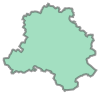

In [62]:
delhi_boundary = Polygon(bounds[(bounds.type == 'administrative') & (bounds.display_name == 'Delhi, India')].geojson.to_dict()[1]['coordinates'][0])
delhi_boundary

In [69]:
pollution_stations['inside_flag'] = pollution_stations.apply(lambda x: delhi_boundary.contains(Point(x['longitude'],x['latitude'])), axis=1)
pollution_stations

,location,lastUpdated,latitude,longitude,inside_flag
0,US Diplomatic Post: New Delhi,2022-10-06 14:30:00+00:00,28.635760,77.224450,True
1,"NSIT Dwarka, Delhi - CPCB",2022-10-06 14:00:00+00:00,28.609090,77.032541,True
2,"Shadipur, Delhi - CPCB",2022-10-06 14:00:00+00:00,28.651478,77.147311,True
3,"IGI Airport (T3), Delhi - IMD",2022-10-06 14:00:00+00:00,28.562776,77.118005,True
4,"Pusa, Delhi - DPCC",2022-10-06 14:00:00+00:00,28.639645,77.146262,True
...,...,...,...,...,...
113,"Anand Vihar, Delhi - DPCC",2018-02-21 21:15:00+00:00,28.650800,77.315200,True
114,"Mandir Marg, Delhi - DPCC",2018-02-21 21:15:00+00:00,28.634100,77.200500,True
121,US Diplomatic Post: New Delhi,2016-11-09 16:30:00+00:00,28.598096,77.189066,True
123,Civil Lines,2015-07-10 08:15:00+00:00,28.678700,77.226200,True


In [73]:
#plotting only the stations that are inside delhi boundary
m = folium.Map(location=[28.6273928, 77.1716954], zoom_start=10)

bounds_folium = []
for pt in bounds[(bounds.type == 'administrative') & (bounds.display_name == 'Delhi, India')].geojson.to_dict()[1]['coordinates'][0]:
    bounds_folium.append([pt[1],pt[0]])

folium.PolyLine(bounds_folium).add_to(m)

#inside stations
for i, r in pollution_stations.iterrows():
    if r['inside_flag'] == True:
        folium.Marker(
            location=[r['latitude'], r['longitude']],
            popup= f"{r['location']} inside delhi",
            icon=folium.Icon(icon="home", color='pink'),
            ).add_to(m)
    else:
        folium.Marker(
            location=[r['latitude'], r['longitude']],
            popup= f"{r['location']} outside delhi",
            icon=folium.Icon(icon="cloud", color='red'),
            ).add_to(m)

m